In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('A', A)

U, d, Vt = np.linalg.svd(A)

print('U', U)
print('d', d)
print('Vt', Vt)

# Reconstruct
S = np.zeros_like(A)
S[:3, :3] = np.diag(d)
B = U @ S @ Vt
print('B', B)



A [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
U [[-0.14087668 -0.82471435  0.54704904 -0.02715407]
 [-0.34394629 -0.42626394 -0.70915928  0.4439517 ]
 [-0.54701591 -0.02781353 -0.22282857 -0.80644121]
 [-0.75008553  0.37063688  0.38493881  0.38964357]]
d [2.54624074e+01 1.29066168e+00 1.80972823e-15]
Vt [[-0.50453315 -0.5745157  -0.64449826]
 [ 0.76077568  0.05714052 -0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]
B [[ 1.1495012   1.97627197  2.80304274]
 [ 4.01401641  4.91570674  5.81739708]
 [ 6.87853161  7.85514151  8.83175141]
 [ 9.74304682 10.79457628 11.84610575]]


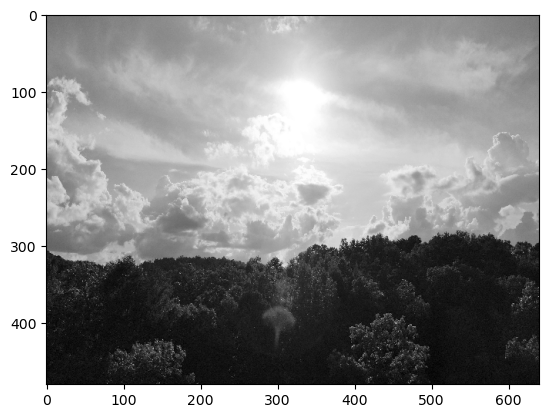

34500
307200


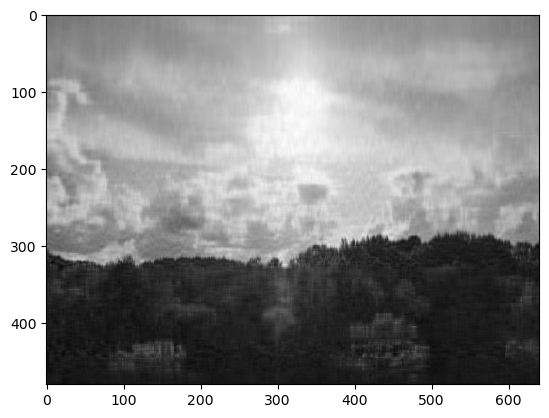

In [3]:
%matplotlib inline

def im_show(im):
    plt.imshow(im, cmap='gray')
    plt.show()

im = cv2.imread('photo.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.resize(im, (640, 480))
im_show(im)

K = 30
U, S, Vt = np.linalg.svd(im, full_matrices=False)
D = np.zeros((K, K))
D[:K, :K] = np.diag(S[:K])
U = U[:, :K]
Vt = Vt[:K, :]

print((D.shape[0] * D.shape[1]) + (U.shape[0] * U.shape[1]) + (Vt.shape[0] * Vt.shape[1]))

A = (U @ D @ Vt)
print(A.shape[0] * A.shape[1])
im_show(A)

